## AutoEncoder

In [1]:
import torch.nn as nn
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
from pathlib import Path
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sys import getsizeof
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot
import matplotlib.pyplot as plt

## Synthetic PMU Dataset 
Far East version


In [2]:
# Define the autoencoder model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim: int, encoding_dim: int):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
           #nn.ReLU()
            #nn.LeakyReLU(0.4),
            # nn.Linear(round((input_dim - encoding_dim)/2), encoding_dim),
            # nn.Sigmoid(),
            #nn.Linear(round(input_dim/2), round(input_dim/4)),
            #nn.ReLU(),
            # nn.Linear(round(input_dim/4), encoding_dim),
            # nn.ReLU()
        )
        self.decoder = nn.Sequential(
            # nn.Linear(encoding_dim, round(input_dim/4)),
            # nn.ReLU(),
            #nn.Linear(round(input_dim/4), round(input_dim/2)),
            ##nn.ReLU(),
            # nn.Linear(encoding_dim, round((input_dim - encoding_dim)/2)),
            # nn.Sigmoid(),
            nn.Linear(encoding_dim, input_dim),
            #nn.Tanh()
            #nn.LeakyReLU(0.2)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
dataset = pd.read_csv(
    "./Datasets/Micro PMU October 1 Dataset/_LBNL_a6_bus1_2015-10-01.csv")
dataset.dropna(inplace=True)
features = dataset[['VL1',
                'VL2',
                'VL3',
                'AL1',
                'AL2',
                'AL3',
                'IC1',
                'IC2',
                'IC3',
                'AC1',
                'AC2',
                'AC3']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)
scaleTime = time.time()
print(f"The time taken for Scaling is {scaleTime - startTime}")

The time taken for Scaling is 1.1651232242584229


In [28]:
p = Path('./Results/Synthetic PMU Far East')
p.mkdir(exist_ok=True, parents=True)
data = pd.read_csv(
    "./Datasets/Synthetic PMU Data/ACTIVSg2000 - Far West.csv")
data.dropna(inplace=True)

features = data[['Bus ODESSA 2 0 V pu',
 'Bus ODESSA 2 0 V angle',
 'Bus ODESSA 2 0 Frequency',
 'Bus PRESIDIO 2 0 V pu',
 'Bus PRESIDIO 2 0 V angle',
 'Bus PRESIDIO 2 0 Frequency',
 'Bus O DONNELL 1 0 V pu',
 'Bus O DONNELL 1 0 V angle',
 'Bus O DONNELL 1 0 Frequency',
 'Bus O DONNELL 1 1 V pu',
 'Bus O DONNELL 1 1 V angle',
 'Bus O DONNELL 1 1 Frequency',
 'Bus BIG SPRING 5 0 V pu',
 'Bus BIG SPRING 5 0 V angle',
 'Bus BIG SPRING 5 0 Frequency',
 'Bus BIG SPRING 5 1 V pu',
 'Bus BIG SPRING 5 1 V angle',
 'Bus BIG SPRING 5 1 Frequency',
 'Bus VAN HORN 0 V pu',
 'Bus VAN HORN 0 V angle',
 'Bus VAN HORN 0 Frequency',
 'Bus IRAAN 2 0 V pu',
 'Bus IRAAN 2 0 V angle',
 'Bus IRAAN 2 0 Frequency',
 'Bus IRAAN 2 1 V pu',
 'Bus IRAAN 2 1 V angle',
 'Bus IRAAN 2 1 Frequency',
 'Bus PRESIDIO 1 0 V pu',
 'Bus PRESIDIO 1 0 V angle',
 'Bus PRESIDIO 1 0 Frequency',
 'Bus PRESIDIO 1 1 V pu',
 'Bus PRESIDIO 1 1 V angle',
 'Bus PRESIDIO 1 1 Frequency',
 'Bus SANDERSON 0 V pu',
 'Bus SANDERSON 0 V angle',
 'Bus SANDERSON 0 Frequency',
 'Bus MONAHANS 2 0 V pu',
 'Bus MONAHANS 2 0 V angle',
 'Bus MONAHANS 2 0 Frequency',
 'Bus GRANDFALLS 0 V pu',
 'Bus GRANDFALLS 0 V angle',
 'Bus GRANDFALLS 0 Frequency',
 'Bus MARFA 0 V pu',
 'Bus MARFA 0 V angle',
 'Bus MARFA 0 Frequency',
 'Bus GARDEN CITY 0 V pu',
 'Bus GARDEN CITY 0 V angle',
 'Bus GARDEN CITY 0 Frequency',
 'Bus ODESSA 4 0 V pu',
 'Bus ODESSA 4 0 V angle',
 'Bus ODESSA 4 0 Frequency',
 'Bus NOTREES 0 V pu',
 'Bus NOTREES 0 V angle',
 'Bus NOTREES 0 Frequency',
 'Bus MIDLAND 4 0 V pu',
 'Bus MIDLAND 4 0 V angle',
 'Bus MIDLAND 4 0 Frequency',
 'Bus BIG SPRING 1 0 V pu',
 'Bus BIG SPRING 1 0 V angle',
 'Bus BIG SPRING 1 0 Frequency',
 'Bus BIG SPRING 1 1 V pu',
 'Bus BIG SPRING 1 1 V angle',
 'Bus BIG SPRING 1 1 Frequency',
 'Bus O DONNELL 2 0 V pu',
 'Bus O DONNELL 2 0 V angle',
 'Bus O DONNELL 2 0 Frequency',
 'Bus O DONNELL 2 1 V pu',
 'Bus O DONNELL 2 1 V angle',
 'Bus O DONNELL 2 1 Frequency',
 'Bus ODESSA 6 0 V pu',
 'Bus ODESSA 6 0 V angle',
 'Bus ODESSA 6 0 Frequency',
 'Bus BIG SPRINGS 0 V pu',
 'Bus BIG SPRINGS 0 V angle',
 'Bus BIG SPRINGS 0 Frequency',
 'Bus BIG SPRINGS 1 V pu',
 'Bus BIG SPRINGS 1 V angle',
 'Bus BIG SPRINGS 1 Frequency',
 'Bus MIDLAND 2 0 V pu',
 'Bus MIDLAND 2 0 V angle',
 'Bus MIDLAND 2 0 Frequency',
 'Bus COAHOMA 0 V pu',
 'Bus COAHOMA 0 V angle',
 'Bus COAHOMA 0 Frequency',
 'Bus MIDLAND 3 0 V pu',
 'Bus MIDLAND 3 0 V angle',
 'Bus MIDLAND 3 0 Frequency',
 'Bus ALPINE 0 V pu',
 'Bus ALPINE 0 V angle',
 'Bus ALPINE 0 Frequency',
 'Bus FORT DAVIS 0 V pu',
 'Bus FORT DAVIS 0 V angle',
 'Bus FORT DAVIS 0 Frequency',
 'Bus MCCAMEY 1 0 V pu',
 'Bus MCCAMEY 1 0 V angle',
 'Bus MCCAMEY 1 0 Frequency',
 'Bus MCCAMEY 1 1 V pu',
 'Bus MCCAMEY 1 1 V angle',
 'Bus MCCAMEY 1 1 Frequency',
 'Bus BIG SPRING 4 0 V pu',
 'Bus BIG SPRING 4 0 V angle',
 'Bus BIG SPRING 4 0 Frequency',
 'Bus BIG SPRING 4 1 V pu',
 'Bus BIG SPRING 4 1 V angle',
 'Bus BIG SPRING 4 1 Frequency',
 'Bus CRANE 0 V pu',
 'Bus CRANE 0 V angle',
 'Bus CRANE 0 Frequency',
 'Bus ODESSA 5 0 V pu',
 'Bus ODESSA 5 0 V angle',
 'Bus ODESSA 5 0 Frequency',
 'Bus FORT STOCKTON 1 0 V pu',
 'Bus FORT STOCKTON 1 0 V angle',
 'Bus FORT STOCKTON 1 0 Frequency',
 'Bus FORT STOCKTON 1 1 V pu',
 'Bus FORT STOCKTON 1 1 V angle',
 'Bus FORT STOCKTON 1 1 Frequency',
 'Bus ANDREWS 0 V pu',
 'Bus ANDREWS 0 V angle',
 'Bus ANDREWS 0 Frequency',
 'Bus FORSAN 0 V pu',
 'Bus FORSAN 0 V angle',
 'Bus FORSAN 0 Frequency',
 'Bus FORSAN 1 V pu',
 'Bus FORSAN 1 V angle',
 'Bus FORSAN 1 Frequency',
 'Bus FORSAN 2 V pu',
 'Bus FORSAN 2 V angle',
 'Bus FORSAN 2 Frequency',
 'Bus BIG LAKE 0 V pu',
 'Bus BIG LAKE 0 V angle',
 'Bus BIG LAKE 0 Frequency',
 'Bus MIDLAND 5 0 V pu',
 'Bus MIDLAND 5 0 V angle',
 'Bus MIDLAND 5 0 Frequency',
 'Bus OZONA 0 V pu',
 'Bus OZONA 0 V angle',
 'Bus OZONA 0 Frequency',
 'Bus MONAHANS 1 0 V pu',
 'Bus MONAHANS 1 0 V angle',
 'Bus MONAHANS 1 0 Frequency',
 'Bus MONAHANS 1 1 V pu',
 'Bus MONAHANS 1 1 V angle',
 'Bus MONAHANS 1 1 Frequency',
 'Bus MONAHANS 1 2 V pu',
 'Bus MONAHANS 1 2 V angle',
 'Bus MONAHANS 1 2 Frequency',
 'Bus MONAHANS 1 3 V pu',
 'Bus MONAHANS 1 3 V angle',
 'Bus MONAHANS 1 3 Frequency',
 'Bus MONAHANS 1 4 V pu',
 'Bus MONAHANS 1 4 V angle',
 'Bus MONAHANS 1 4 Frequency',
 'Bus MONAHANS 1 5 V pu',
 'Bus MONAHANS 1 5 V angle',
 'Bus MONAHANS 1 5 Frequency',
 'Bus MONAHANS 1 6 V pu',
 'Bus MONAHANS 1 6 V angle',
 'Bus MONAHANS 1 6 Frequency',
 'Bus STANTON 0 V pu',
 'Bus STANTON 0 V angle',
 'Bus STANTON 0 Frequency',
 'Bus ODONNELL 0 V pu',
 'Bus ODONNELL 0 V angle',
 'Bus ODONNELL 0 Frequency',
 'Bus LENORAH 0 V pu',
 'Bus LENORAH 0 V angle',
 'Bus LENORAH 0 Frequency',
 'Bus LENORAH 1 V pu',
 'Bus LENORAH 1 V angle',
 'Bus LENORAH 1 Frequency',
 'Bus IRAAN 3 0 V pu',
 'Bus IRAAN 3 0 V angle',
 'Bus IRAAN 3 0 Frequency',
 'Bus IRAAN 3 1 V pu',
 'Bus IRAAN 3 1 V angle',
 'Bus IRAAN 3 1 Frequency',
 'Bus IRAAN 3 2 V pu',
 'Bus IRAAN 3 2 V angle',
 'Bus IRAAN 3 2 Frequency',
 'Bus BIG SPRING 6 0 V pu',
 'Bus BIG SPRING 6 0 V angle',
 'Bus BIG SPRING 6 0 Frequency',
 'Bus BIG SPRING 6 1 V pu',
 'Bus BIG SPRING 6 1 V angle',
 'Bus BIG SPRING 6 1 Frequency',
 'Bus BIG SPRING 6 2 V pu',
 'Bus BIG SPRING 6 2 V angle',
 'Bus BIG SPRING 6 2 Frequency',
 'Bus ODESSA 3 0 V pu',
 'Bus ODESSA 3 0 V angle',
 'Bus ODESSA 3 0 Frequency',
 'Bus BIG SPRING 3 0 V pu',
 'Bus BIG SPRING 3 0 V angle',
 'Bus BIG SPRING 3 0 Frequency',
 'Bus BIG SPRING 3 1 V pu',
 'Bus BIG SPRING 3 1 V angle',
 'Bus BIG SPRING 3 1 Frequency',
 'Bus BIG SPRING 7 0 V pu',
 'Bus BIG SPRING 7 0 V angle',
 'Bus BIG SPRING 7 0 Frequency',
 'Bus MIDLAND 1 0 V pu',
 'Bus MIDLAND 1 0 V angle',
 'Bus MIDLAND 1 0 Frequency',
 'Bus IRAAN 1 0 V pu',
 'Bus IRAAN 1 0 V angle',
 'Bus IRAAN 1 0 Frequency',
 'Bus IRAAN 1 1 V pu',
 'Bus IRAAN 1 1 V angle',
 'Bus IRAAN 1 1 Frequency',
 'Bus ODESSA 1 0 V pu',
 'Bus ODESSA 1 0 V angle',
 'Bus ODESSA 1 0 Frequency',
 'Bus ODESSA 1 1 V pu',
 'Bus ODESSA 1 1 V angle',
 'Bus ODESSA 1 1 Frequency',
 'Bus ODESSA 1 2 V pu',
 'Bus ODESSA 1 2 V angle',
 'Bus ODESSA 1 2 Frequency',
 'Bus ODESSA 1 3 V pu',
 'Bus ODESSA 1 3 V angle',
 'Bus ODESSA 1 3 Frequency',
 'Bus ODESSA 1 4 V pu',
 'Bus ODESSA 1 4 V angle',
 'Bus ODESSA 1 4 Frequency',
 'Bus ODESSA 1 5 V pu',
 'Bus ODESSA 1 5 V angle',
 'Bus ODESSA 1 5 Frequency',
 'Bus ODESSA 1 6 V pu',
 'Bus ODESSA 1 6 V angle',
 'Bus ODESSA 1 6 Frequency',
 'Bus ODESSA 1 7 V pu',
 'Bus ODESSA 1 7 V angle',
 'Bus ODESSA 1 7 Frequency',
 'Bus ODESSA 1 8 V pu',
 'Bus ODESSA 1 8 V angle',
 'Bus ODESSA 1 8 Frequency',
 'Bus ODESSA 1 9 V pu',
 'Bus ODESSA 1 9 V angle',
 'Bus ODESSA 1 9 Frequency',
 'Bus ODESSA 1 10 V pu',
 'Bus ODESSA 1 10 V angle',
 'Bus ODESSA 1 10 Frequency',
 'Bus FORT STOCKTON 2 0 V pu',
 'Bus FORT STOCKTON 2 0 V angle',
 'Bus FORT STOCKTON 2 0 Frequency',
 'Bus FORT STOCKTON 3 0 V pu',
 'Bus FORT STOCKTON 3 0 V angle',
 'Bus FORT STOCKTON 3 0 Frequency',
 'Bus BIG SPRING 2 0 V pu',
 'Bus BIG SPRING 2 0 V angle',
 'Bus BIG SPRING 2 0 Frequency',
 'Bus KERMIT 0 V pu',
 'Bus KERMIT 0 V angle',
 'Bus KERMIT 0 Frequency',
 'Bus PECOS 0 V pu',
 'Bus PECOS 0 V angle',
 'Bus PECOS 0 Frequency',
 'Bus SHEFFIELD 0 V pu',
 'Bus SHEFFIELD 0 V angle',
 'Bus SHEFFIELD 0 Frequency',
 'Bus MCCAMEY 2 0 V pu',
 'Bus MCCAMEY 2 0 V angle',
 'Bus MCCAMEY 2 0 Frequency',
 'Bus LAMESA 0 V pu',
 'Bus LAMESA 0 V angle',
 'Bus LAMESA 0 Frequency',
 'Bus GOLDSMITH 0 V pu',
 'Bus GOLDSMITH 0 V angle',
 'Bus GOLDSMITH 0 Frequency',
 'Bus RALLS 2 0 V pu',
 'Bus RALLS 2 0 V angle',
 'Bus RALLS 2 0 Frequency']].astype(np.float32)

startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)
scaleTime = time.time()
print(f"The time taken for Scaling is {scaleTime - startTime}")

The time taken for Scaling is 0.24841737747192383


In [5]:
dataset = pd.read_csv(
    "./Datasets/Household data/household_data_1min_singleindex.csv")
features = dataset.drop(['utc_timestamp', 'cet_cest_timestamp', 'interpolated'], axis = 1).astype(np.float32)
features = features.fillna(0)
startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)
scaleTime = time.time()
print(f"The time taken for Scaling is {scaleTime - startTime}")

/tmp/ipykernel_4360/42442861.py:1: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(


The time taken for Scaling is 1.2500982284545898


In [ ]:
dataset = pd.read_csv(
    "./Datasets/SGCC Theft/data set.csv")
features = dataset.drop(["FLAG", "CONS_NO"], axis=1)
features = features.fillna(0)
startTime = time.time()
# Scale the data
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)
scaleTime = time.time()
print(f"The time taken for Scaling is {scaleTime - startTime}")

The time taken for Scaling is 0.39788222312927246


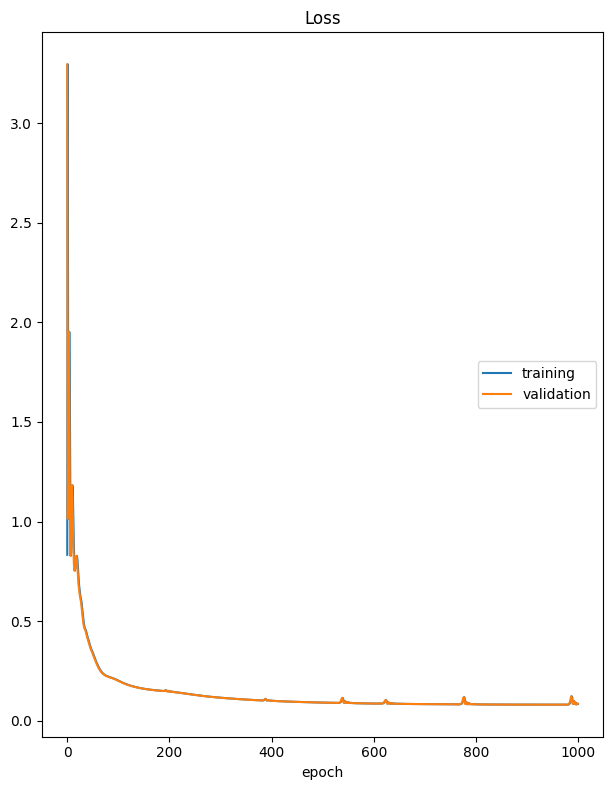

100%|██████████| 1000/1000 [03:38<00:00,  4.57it/s]

Loss
	training         	 (min:    0.081, max:    3.294, cur:    0.084)
	validation       	 (min:    0.081, max:    3.294, cur:    0.085)
The time taken for Training is 226.05341911315918
The time taken for Forward Pass is 0.09920549392700195
Total time for full run is 226.15262460708618


Mean Squared Error: 0.24077504746463307
R-squared: 0.7592249525353675


In [8]:
scaledFeaturesTensor = torch.FloatTensor(scaledFeatures)

X_train, X_val = train_test_split(scaledFeatures, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)

# Hyperparameters
inputDim = scaledFeatures.shape[1]  # Original feature dimension
encodingDim = 10  # You can adjust the size of the encoding
numEpochs = 1000
learningRate = 0.007

# AutoEncoder
model = AutoEncoder(inputDim, encodingDim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)



    
liveloss = PlotLosses()

for epoch in tqdm(range(1000)):
    logs = {}
    for phase in ['train', 'validation']:
        epochStartTime = time.time()
        running_loss = 0.0
        if phase == 'train':
            model.train()
        else:
            model.eval()


        #Forward Pass
        reduced, outputs = model(X_val_tensor)

        # Compute the loss
        loss = criterion(outputs, X_val_tensor)
        if phase == "train":
            #Zero the gradients
            optimizer.zero_grad()
            # Backward pass
            loss.backward()
             # Update the weights
            optimizer.step()
            running_loss += loss.item() * X_train_tensor.size(0)
            epoch_loss = running_loss / len(X_train_tensor)
            prefix = "Training"


        if phase == "validation":
            running_loss += loss.item() * X_val_tensor.size(0)
            epoch_loss = running_loss / len(X_val_tensor)
            prefix = "Validation"
        logs[prefix + " loss"] = epoch_loss
    liveloss.update({'loss': logs["Training loss"], 'val_loss': logs["Validation loss"]})
    liveloss.draw()

training_time = time.time()
print(f"The time taken for Training is {training_time - startTime}")
# Reconstruct the original data
model.eval()
with torch.no_grad():
    ReducedTensor, OutputTensor = model(scaledFeaturesTensor)

OutputNumpy = OutputTensor.numpy()

forward_pass_time = time.time()
print(f"The time taken for Forward Pass is {forward_pass_time - training_time}")
print(f"Total time for full run is {forward_pass_time - startTime}")

# Calculate MSE
mse = mean_squared_error(scaledFeatures, OutputNumpy)
print(f'Mean Squared Error: {mse}')

# Calculate R²
variance_original = np.var(scaledFeatures)
r_squared = 1 - (mse / variance_original)
print(f'R-squared: {r_squared}')
 

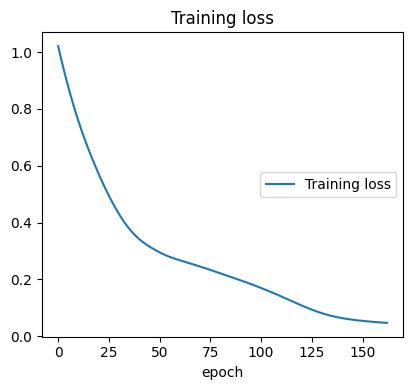

 16%|█▋        | 163/1000 [03:51<19:39,  1.41s/it]

Training loss
	Training loss    	 (min:    0.047, max:    1.021, cur:    0.047)


 16%|█▋        | 163/1000 [03:53<19:56,  1.43s/it]


KeyboardInterrupt: 

In [11]:
scaledFeaturesTensor = torch.FloatTensor(scaledFeatures)

X_train, X_val = train_test_split(scaledFeatures, test_size=0.2, random_state=42)

# Hyperparameters
inputDim = scaledFeatures.shape[1]  # Original feature dimension
encodingDim = 9  # You can adjust the size of the encoding
numEpochs = 1000
learningRate = 0.007

# AutoEncoder
model = AutoEncoder(inputDim, encodingDim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
liveloss = PlotLosses(figsize=[8,4])

#Training
for epoch in tqdm(range(numEpochs)):
    logs = {}
    epochStartTime = time.time()
    running_loss = 0.0
    model.train()

    #Zero the gradients
    optimizer.zero_grad()

    #Forward Pass
    reduced, outputs = model(scaledFeaturesTensor)

    # Compute the loss
    loss = criterion(outputs, scaledFeaturesTensor)

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

    running_loss += loss.item() * scaledFeaturesTensor.size(0)
    epoch_loss = running_loss / len(scaledFeaturesTensor)
    logs["Training loss"] = np.sqrt(epoch_loss)
    liveloss.update(logs)
    liveloss.draw()

    # Print the loss at every 100 epochs
    # if (epoch + 1) % 100 == 0:
    #     print(f'Epoch [{epoch + 1}/{numEpochs}], Loss: {loss.item():.4f}')
    #     epoch_time = time.time()
    #     print(f"The time taken for Epoch:[{epoch + 1}/{numEpochs}] is {epoch_time - epochStartTime}")
    #     print(f"Total time till now is {epoch_time - startTime}")


training_time = time.time()
print(f"The time taken for Training is {training_time - startTime}")
# Reconstruct the original data
model.eval()
with torch.no_grad():
    ReducedTensor, OutputTensor = model(scaledFeaturesTensor)

OutputNumpy = OutputTensor.numpy()

forward_pass_time = time.time()
print(f"The time taken for Forward Pass is {forward_pass_time - training_time}")
print(f"Total time for full run is {forward_pass_time - startTime}")

# Calculate MSE
mse = mean_squared_error(scaledFeatures, OutputNumpy)
print(f'Mean Squared Error: {mse}')

# Calculate R²
variance_original = np.var(scaledFeatures)
r_squared = 1 - (mse / variance_original)
print(f'R-squared: {r_squared}')

